In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

/var/folders/p7/w3v0h0sj79b__vhxymx1tvbw0000gn/T/ipykernel_41076/1152578926.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [2]:
import random
import tqdm
plt.rcParams['figure.dpi'] = 300
plt.style.use('seaborn-bright')

cm = plt.get_cmap('plasma')

def compute_hitrate(df, Nms, THRESHOLD, N_max, ranked=False):
    hits, hits_std = [], []
    for nmax in Nms:
        hits_trial, hit_std_trial = [], []
        for trial in range(n_trial):
            rmsds = []
            for _, row in df.iterrows():
                rs = [row[f"rmsd_{i}"] for i in range(N_max)]
                if ranked: 
                    rs = rs[:nmax]
                else:
                    rs = random.choices(rs, k=nmax)  # with replacement
                rmsds.append(min(rs))
    
            hits_trial.append(np.mean(np.array(rmsds) < THRESHOLD))
        hits.append(np.mean(hits_trial))
        hits_std.append(np.std(hits_trial))
    print(f"Success rate @ {THRESHOLD}A:", hits, "std:", hits_std)
    return np.array(hits), np.array(hits_std)

def compute_percentiles(df, Nms, percentile, N_max, ranked=False):
    hits, hits_std = [], []
    for nmax in Nms:
        hits_trial, hit_std_trial = [], []
        for trial in range(n_trial):
            rmsds = []
            for _, row in df.iterrows():
                rs = [row[f"rmsd_{i}"] for i in range(N_max)]
                if ranked: 
                    rs = rs[:nmax]
                else:
                    rs = random.choices(rs, k=nmax)  # with replacement
                rmsds.append(min(rs))
    
            hits_trial.append(np.percentile(np.array(rmsds), percentile))
        hits.append(np.mean(hits_trial))
        hits_std.append(np.std(hits_trial))
    print(f"Percentile {percentile}:", hits, "std:", hits_std)
    return np.array(hits), np.array(hits_std)

n_trial = 100

Nms = [1, 2, 4, 8, 16]
NUM_COLORS = 5
n_trial = 40

# Pre-computed metric csvs for individual samples, or replace by custom result paths
dfs = {
    "NeuralPLexer@PDBBind": "../neuralplexermodels_downstream_datasets_predictions/predictions/pdbbind_rigid_docking/nplxatpdbbind/pdbbind2019+_benchmarking_summary.csv",
    "NeuralPLexer": "../neuralplexermodels_downstream_datasets_predictions/predictions/pdbbind_rigid_docking/base/pdbbind2019+_benchmarking_summary.csv",
}

/var/folders/p7/w3v0h0sj79b__vhxymx1tvbw0000gn/T/ipykernel_41076/2468741180.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-bright')


In [3]:
df = pd.read_csv(dfs["NeuralPLexer"])
compute_hitrate(df, [1], 2.0, 32)
compute_hitrate(df, [1], 5.0, 32)
compute_percentiles(df, [1], 25, 32)
compute_percentiles(df, [1], 50, 32)
compute_percentiles(df, [1], 75, 32)

compute_hitrate(df, [5], 2.0, 32)
compute_hitrate(df, [5], 5.0, 32)
compute_percentiles(df, [5], 25, 32)
compute_percentiles(df, [5], 50, 32)
compute_percentiles(df, [5], 75, 32)

Success rate @ 2.0A: [0.39469696969696966] std: [0.008645651220209785]
Success rate @ 5.0A: [0.6955234159779614] std: [0.011341492741761387]
Percentile 25: [1.3481093750000002] std: [0.03332166836661056]
Percentile 50: [2.8264085000000003] std: [0.08265064626335358]
Percentile 75: [5.9401895] std: [0.14381473925592597]
Success rate @ 2.0A: [0.4711432506887053] std: [0.006356641117244055]
Success rate @ 5.0A: [0.7671487603305784] std: [0.008968782738823806]
Percentile 25: [1.06277325] std: [0.029069002402688306]
Percentile 50: [2.2497635] std: [0.06523169385160861]
Percentile 75: [4.730323375] std: [0.14173837664155875]


(array([4.73032338]), array([0.14173838]))

Success rate @ 2A: [0.32665289256198343, 0.37252066115702476, 0.4110881542699724, 0.44228650137741055, 0.4644628099173554] std: [0.011604427738316849, 0.009492896700545572, 0.009290886317825464, 0.007741733055865781, 0.006513272957320598]
Success rate @ 2A: [0.3946969696969697, 0.4263085399449036, 0.45812672176308544, 0.4818870523415978, 0.49800275482093664] std: [0.010828014592805472, 0.008878690010734614, 0.008199931716880013, 0.005758415982557626, 0.004869394400637335]


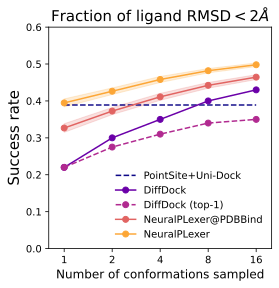

In [4]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
ax.set_prop_cycle('color', [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
    

THRESHOLD = 2  

# Baseline statistics from reference
plt.plot(Nms, [0.389, 0.389, 0.389, 0.389, 0.389], '--', label="PointSite+Uni-Dock")
plt.plot(Nms, [0.22, 0.30, 0.35, 0.40, 0.43], '-o', label="DiffDock")
plt.plot(Nms, [0.22, 0.275, 0.31, 0.34, 0.35], '--o', label="DiffDock (top-1)")

for label, name in dfs.items():
    df = pd.read_csv(name)
    y, yerr = compute_hitrate(df, Nms, THRESHOLD, max(Nms))
    line, = plt.plot(Nms, y, '-o', label=label)
    plt.fill_between(Nms, y - yerr, y + yerr, color=line.get_color(), alpha=0.2)
plt.legend(frameon=False, loc='lower right')

plt.title(r"Fraction of ligand RMSD$<2\AA$", fontsize=15)
plt.xlabel(r"Number of conformations sampled", fontsize=12)
plt.xscale('log', base=2)
plt.xlim(0.8, 20)
plt.ylim(0.0, 0.6)
plt.xticks(Nms, Nms)
plt.ylabel(r"Success rate", fontsize=15)
plt.savefig("figures/fig3a.svg", format="svg",bbox_inches='tight')
plt.show()

Success rate @ 5A: [0.5941460055096419, 0.6389807162534435, 0.6799586776859504, 0.7110881542699724, 0.7325068870523417] std: [0.012704885023838257, 0.012164180040859706, 0.007666313273299314, 0.007422376680268033, 0.006245611046145809]
Success rate @ 5A: [0.6980716253443526, 0.7295454545454546, 0.7573691460055096, 0.7758264462809918, 0.7923553719008265] std: [0.007955663403963448, 0.01077356018552371, 0.008828062139934909, 0.007435146370019247, 0.0048381236335216125]


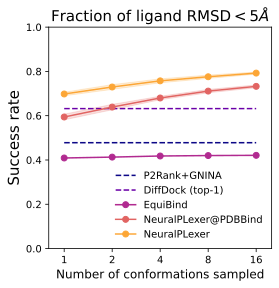

In [5]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
ax.set_prop_cycle('color', [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
    

THRESHOLD = 5 

plt.plot(Nms, [0.478, 0.478, 0.478, 0.478, 0.478], '--', label="P2Rank+GNINA")
plt.plot(Nms, [0.632, 0.632, 0.632, 0.632, 0.632], '--', label="DiffDock (top-1)")
plt.plot(Nms, [0.409, 0.413, 0.418, 0.420, 0.421], '-o', label="EquiBind")

for label, name in dfs.items():
    df = pd.read_csv(name)
    y, yerr = compute_hitrate(df, Nms, THRESHOLD, max(Nms))
    line, = plt.plot(Nms, y, '-o', label=label)
    plt.fill_between(Nms, y - yerr, y + yerr, color=line.get_color(), alpha=0.2)
    
plt.legend(frameon=False, loc='lower right')

plt.title(r"Fraction of ligand RMSD$<5\AA$", fontsize=15)
plt.xlabel(r"Number of conformations sampled", fontsize=12)
plt.xscale('log', base=2)
plt.xlim(0.8, 20)
plt.ylim(0.0, 1.0)
#plt.yscale('log')
plt.xticks(Nms, Nms)
plt.ylabel(r"Success rate", fontsize=15)
plt.savefig("figures/fig3b.svg", format="svg",bbox_inches='tight')
plt.show()

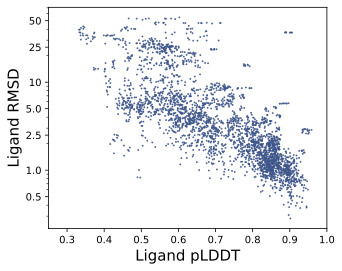

In [13]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(5, 4))
df = pd.read_csv("../neuralplexermodels_downstream_datasets_predictions/predictions/pdbbind_rigid_docking/plddt/pdbbind2019+_benchmarking_summary.csv")
plddt = pd.concat([df[f"plddt_lig_{i}"] for i in range(8)])
rmsds = pd.concat([df[f"rmsd_{i}"] for i in range(8)])
plt.scatter(plddt, rmsds, s=1, alpha=0.8, color='#3C5488FF')
plt.yscale('log')
plt.xlim(0.25, 1)
plt.yticks([0.5, 1.0, 2.5, 5.0, 10.0, 25.0, 50], [0.5, 1.0, 2.5, 5.0, 10, 25, 50])
plt.xlabel('Ligand pLDDT', fontsize=15)
plt.ylabel("Ligand RMSD", fontsize=15)
plt.savefig("figures/fig3c.svg", format="svg",bbox_inches='tight')
plt.show()

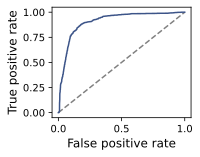

In [14]:
import scikitplot as skplt
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(2.5, 2))
ax = fig.add_subplot(111)
NUM_COLORS = 2
ax.set_prop_cycle('color', [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label='Random')
plt.plot([], [])
y_true = (np.array(rmsds)<2.0)
y_probas = plddt
fpr, tpr, _ = skplt.metrics.roc_curve(y_true, y_probas)
plt.plot(fpr, tpr, label=r'RMSD<2$\AA$', color='#3C5488FF')
plt.xlabel("False positive rate", fontsize=12)
plt.ylabel("True positive rate", fontsize=12)

plt.savefig("figures/fig3d.svg", format="svg",bbox_inches='tight')
plt.show()

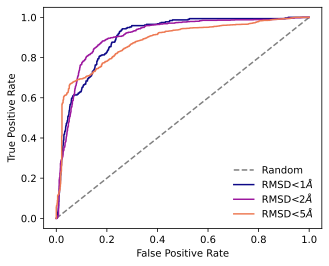

In [10]:
import scikitplot as skplt
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
NUM_COLORS = 3
ax.set_prop_cycle('color', [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label='Random')
y_true = (np.array(rmsds)<1.0)
y_probas = plddt
fpr, tpr, _ = skplt.metrics.roc_curve(y_true, y_probas)
plt.plot(fpr, tpr, label=r'RMSD<1$\AA$')
y_true = (np.array(rmsds)<2.0)
y_probas = plddt
fpr, tpr, _ = skplt.metrics.roc_curve(y_true, y_probas)
plt.plot(fpr, tpr, label=r'RMSD<2$\AA$')
y_true = (np.array(rmsds)<5.0)
y_probas = plddt
fpr, tpr, _ = skplt.metrics.roc_curve(y_true, y_probas)
plt.plot(fpr, tpr, label=r'RMSD<5$\AA$')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(frameon=False)
plt.show()